# Data Science Project (Python) 1: Social Media Data (Twitter)

### Prerequisites: 
 https://developer.twitter.com/en/docs/twitter-api/v1/trends/trends-for-location/api-reference/get-trends-place
 is the documentation for this call, 
 https://developer.twitter.com/en/docs/api-reference-index a full overview on Twitter's APIs. 

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/

<b>To get json response object </b>
Go to Browser > Navigate to twitter and search with trend > Press F12 (Developer tool) > Click on Network > filter with Json > find the json response 


https://www.w3schools.com/python/python_json.asp

https://www.w3schools.com/python/python_lists_comprehension.asp

<b>Note:</b> I will upload the data set and code files inot GitHub


### Requirements:
1.	Twitter data(https://twitter.com/home)
2.	Topics > Trends > tweets
3.	Topics (WWTrends.json and USTrends.json)
4.	Trends(WeLoveTheEarth.json)


### Preliminary investigation on the data:
1.	Install json viewer plugin to notepad++ 
2.	Let’s understand the json data 
3.	About topics, trends,tweets, hashtags, retweeted_status, retweet_count, favorite_count, followers_count, screen_name, etc..

### Question:
1.	Find the what are the common trend among the two topics?
2.	Explore trend from the common ( #WeLoveTheEarth) and give me your conclusion 
<br>a.	Find the influence in tweets 
<br>b.	Did the retweets occur around a particular tweet?
<br>c.	More followers, retweets and favorites 
<br>d.	What language they using for tweets?
<br>e.	What devices is using more while tweeting?
<br>f.	Is there any relation between favorite and retweet ?


## 1. Load the data

In [22]:
#loading json module
import json

In [23]:
# Load WW_trends and US_trends data into the the given variables respectively
WW_trends=json.loads(open('datasets/WWTrends.json').read())
US_trends=json.loads(open('datasets/USTrends.json').read())

In [27]:
# Pretty-printing the results. First WW and then US trends.
json.dumps(WW_trends)

json.dumps(US_trends)


'[{"trends": [{"name": "#WeLoveTheEarth", "url": "http://twitter.com/search?q=%23WeLoveTheEarth", "promoted_content": null, "query": "%23WeLoveTheEarth", "tweet_volume": 159698}, {"name": "#DragRace", "url": "http://twitter.com/search?q=%23DragRace", "promoted_content": null, "query": "%23DragRace", "tweet_volume": 37166}, {"name": "Lil Dicky", "url": "http://twitter.com/search?q=%22Lil+Dicky%22", "promoted_content": null, "query": "%22Lil+Dicky%22", "tweet_volume": 42461}, {"name": "Derrick White", "url": "http://twitter.com/search?q=%22Derrick+White%22", "promoted_content": null, "query": "%22Derrick+White%22", "tweet_volume": 27104}, {"name": "#CUZILOVEYOU", "url": "http://twitter.com/search?q=%23CUZILOVEYOU", "promoted_content": null, "query": "%23CUZILOVEYOU", "tweet_volume": null}, {"name": "Kevin Durant", "url": "http://twitter.com/search?q=%22Kevin+Durant%22", "promoted_content": null, "query": "%22Kevin+Durant%22", "tweet_volume": 21870}, {"name": "#StarTrekDiscovery", "url": 


We have an array of trend objects having: the name of the trending topic, the query parameter that can be used to search for the topic on Twitter-Search, the search URL and the volume of tweets for the last 24 hours, if available. (The trends get updated every 5 mins.)

At query time <b>#BeratKandili, #GoodFriday and #WeLoveTheEarth </b> were trending WW.

"tweet_volume" tell us that #WeLoveTheEarth was the most popular among the three.

Results are not sorted by "tweet_volume".

There are some trends which are unique to the US


In [38]:
# sort the tweet valume
WW_trends_name_volume=[
    (
        tweet['name'],
        tweet['tweet_volume']
    )
    for tweet in WW_trends[0]['trends']
     if isinstance(tweet['tweet_volume'],int)
]

US_trends_name_volume=[
    (
        tweet['name'],
        tweet['tweet_volume']
    )
    for tweet in US_trends[0]['trends']
     if isinstance(tweet['tweet_volume'],int)
]

#get the last key
def last(n):
    return n[m]

#function to sort the tuple
def sort(tuples):
    #We pass used defined function last
    #as a parameter
    return sorted(tuples,key=last,reverse=True)

m=1
    
print("WW Sorted:")
print(sort(WW_trends_name_volume))
print("\nWW Sorted:")
print(sort(US_trends_name_volume))

WW Sorted:
[('#BLACKPINKxCorden', 253605), ('#WeLoveTheEarth', 159698), ('#HanumanJayanti', 83138), ('#GoodFriday', 81891), ('#يوم_الجمعه', 80799), ('#KpuJanganCurang', 75384), ('十二国記', 46803), ('#BeratKandili', 46373), ('Lil Dicky', 42461), ('#ConCalmaRemix', 37846), ('#DragRace', 37166), ('池袋の事故', 34381), ('高齢者', 28382), ('Derry', 28234), ('#Ontas', 27924), ('Derrick White', 27104), ('歩行者', 25405), ('Hemant Karkare', 24067), ('#DinahJane1', 23757), ('グレア', 23485), ('プリウス', 22944), ('Priyanka Chaturvedi', 22342), ('#Jersey', 20509), ('#HayırlıCumalar', 19848), ('#IndonesianElectionHeroes', 19664), ('Lyra McKee', 17606), ('#اغلاق_BBM', 17055), ('브이알', 15490), ('Berat Kandilimiz', 10901)]

WW Sorted:
[('"Earth"', 338417), ('#BLACKPINKxCorden', 253605), ('#WeLoveTheEarth', 159698), ('Lil Dicky', 42461), ('#ConCalmaRemix', 37846), ('#DragRace', 37166), ('Derry', 28234), ('George Conway', 27458), ('Derrick White', 27104), ('#DinahJane1', 23757), ('Kevin Durant', 21870), ('#TimeToImpeach', 

## 2. Find the comman trend

In [39]:
# Extracting all the WW trend names from WW_trends
world_trends=set([
    trend['name']
    for trend in WW_trends[0]['trends']
])

In [40]:
# Extracting all the US trend names from US_trends
us_trends=set([
    trend['name']
    for trend in US_trends[0]['trends']
])

In [41]:
# Getting the intersection of the two sets of trends
common_trends=world_trends.intersection(us_trends)

In [42]:
#length of comman trend

len(common_trends)

11

In [43]:
#print comman trends
common_trends

{'#AFLNorthDons',
 '#BLACKPINKxCorden',
 '#ConCalmaRemix',
 '#DinahJane1',
 '#DragRace',
 '#NRLBulldogsSouths',
 '#WeLoveTheEarth',
 'Derrick White',
 'Derry',
 'Lil Dicky',
 'Lyra McKee'}

## 3. Exploring the hot trend

In [45]:
# Loading the hot trend data 
tweets=json.loads(open('datasets/WeLoveTheEarth.json').read())

In [46]:
# Inspecting some tweets
tweets[0:2]

[{'created_at': 'Fri Apr 19 08:46:48 +0000 2019',
  'id': 1119160405270523904,
  'id_str': '1119160405270523904',
  'text': 'RT @lildickytweets: 🌎 out now #WeLoveTheEarth https://t.co/L22XsoT5P1',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'WeLoveTheEarth', 'indices': [30, 45]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'lildickytweets',
     'name': 'LD',
     'id': 1209516660,
     'id_str': '1209516660',
     'indices': [3, 18]}],
   'urls': [{'url': 'https://t.co/L22XsoT5P1',
     'expanded_url': 'https://youtu.be/pvuN_WvF1to',
     'display_url': 'youtu.be/pvuN_WvF1to',
     'indices': [46, 69]}]},
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 212

## 4. Digging deeper

In [48]:
# Extracting the text of all the tweets from the tweet object
texts=[
      tweet['text']
    for tweet in tweets
        
]

In [49]:
# Extracting screen names of users tweeting about #WeLoveTheEarth
names=[
    user_mention['screen_name']
    for tweet in tweets
         for user_mention in tweet['entities']['user_mentions']
]

In [50]:
# Extracting all the hashtags being used when talking about this topic
hash_tags=[
    hash_tag['text']
    for tweet in tweets
         for hash_tag in tweet['entities']['hashtags']
]

In [51]:
#zip and print the list of text,screen names,hashtags 

list(zip(texts,names,hash_tags))

[('RT @lildickytweets: 🌎 out now #WeLoveTheEarth https://t.co/L22XsoT5P1',
  'lildickytweets',
  'WeLoveTheEarth'),
 ('💚🌎💚  #WeLoveTheEarth 👇🏼', 'cabeyoomoon', 'WeLoveTheEarth'),
 ('RT @cabeyoomoon: Ta piosenka to bop,  wpada w ucho  i dochody z niej idą na dobry cel,  warto słuchać w kółko i w kółko gdziekolwiek się ty…',
  'Spotify',
  'WeLoveTheEarth'),
 ('#WeLoveTheEarth \nCzemu ja się popłakałam', 'lildickytweets', 'EARTH'),
 ('RT @Spotify: This is epic. @lildickytweets got @justinbieber, @arianagrande, @halsey, @sanbenito, @edsheeran, @SnoopDogg, @ShawnMendes, @Kr…',
  'justinbieber',
  'WeLoveTheEarth'),
 ('RT @biebercentineo: Justin : are we gonna die? \nLil dicky: you know bieber we might die \n\nBTCH IM CRYING #EARTH #WeLoveTheEarth #WELOVEEART…',
  'ArianaGrande',
  'WeLoveTheEarth'),
 ('RT @dreamsiinflate: #WeLoveTheEarth “i am a fat fucking pig” okay brendon urie https://t.co/FdJmq31xZc',
  'halsey',
  'WeLoveTheEarth'),
 ("Literally no one:\n\nMe in the past 4 hours:\n\nI

<b>Conclusion: A lot of big artists are behind this twitter wave, especially lildicky

## 5. Frequency analysis

In [52]:
# Importing Counter module
from collections import Counter


In [54]:
# Counting occcurrences/ getting frequency dist of all names and hashtags
for item in [names,hash_tags]:
    c=Counter(item)
    print(c.most_common(10),'\n')


[('lildickytweets', 102), ('LeoDiCaprio', 44), ('ShawnMendes', 33), ('halsey', 31), ('ArianaGrande', 30), ('justinbieber', 29), ('Spotify', 26), ('edsheeran', 26), ('sanbenito', 25), ('SnoopDogg', 25)] 

[('WeLoveTheEarth', 313), ('4future', 12), ('19aprile', 12), ('EARTH', 11), ('fridaysforfuture', 10), ('EarthMusicVideo', 3), ('ConCalmaRemix', 3), ('Earth', 3), ('aliens', 2), ('AvengersEndgame', 2)] 



<b>Conclusion: <br>1. A lot of big artists are behind this twitter wave, especially lildicky and Leo DiCaprio<br>    2. more hashtags about songs  loving the earth   </b>

    

## 6.Activity around the trend

Let's further analyze the data to find patterns in the activity around the tweets — did all retweets occur around a particular tweet?

If a tweet has been retweeted, the 'retweeted_status' field gives many interesting details about the original tweet itself and its author.

We can measure a tweet's popularity by analyzing the retweetcount and favoritecount fields. But let's also extract the number of followers of the tweeter — we have a lot of celebs in the picture, so can we tell if their advocating for #WeLoveTheEarth influenced a significant proportion of their followers?

In [56]:
# Extracting useful information from retweets
retweets=[
    (
        tweet['retweeted_status']['retweet_count'],
         tweet['retweeted_status']['favorite_count'],
        tweet['retweeted_status']['user']['followers_count'],
        tweet['retweeted_status']['user']['screen_name'],
        tweet['text']
    )
    
    for tweet in tweets
       if 'retweeted_status' in tweet
]

In [61]:
# Importing pandas module
import pandas as pd

In [64]:
# Create a DataFrame and visualize the data in a pretty and insightful format
df=pd.DataFrame(
            retweets,
            columns=['retweet','favorite','followers','screen_name','text']).groupby(
            ['screen_name','text','followers']).sum().sort_values(by=['followers'],ascending=False)
df.style.background_gradient()

## 7. Analyzing used languages

In [66]:
# Extracting language for each tweet and appending it to the list of languages
tweet_lang=[]    
for tweet in tweets:
    tweet_lang.append(tweet['lang'])

In [67]:
# Counting occcurrences/ getting frequency
for item in [tweet_lang]:
    c=Counter(item)
    print(c,'\n')

Counter({'en': 286, 'pl': 107, 'it': 36, 'es': 32, 'pt': 22, 'und': 17, 'fr': 10, 'ja': 4, 'ru': 2, 'in': 2, 'eu': 1, 'de': 1, 'tl': 1, 'hi': 1}) 



In [68]:
# Importing matplotlib.pyplot module
import matplotlib.pyplot as plt

(array([303., 107.,  22.,  14.,  36.,  32.,   3.,   2.,   1.,   2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

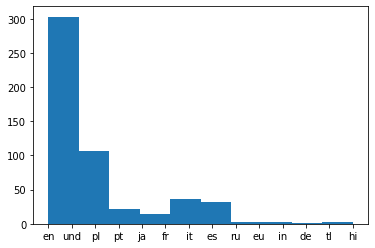

In [69]:
# Plotting the distribution of languages
%matplotlib inline
plt.hist(tweet_lang)

## 8.Analyzing used source

In [78]:
# Extracting language for each tweet and appending it to the list of sources
tweet_source=[]    
for tweet in tweets:
    tweet_source.append((tweet['source'].split('>')[1]).split('<')[0])

In [79]:
# Counting occcurrences/ getting frequency
for item in [tweet_source]:
    c=Counter(item)
    print(c,'\n')

Counter({'Twitter for iPhone': 246, 'Twitter for Android': 232, 'Twitter Web App': 20, 'Twitter Web Client': 19, 'Twitter for iPad': 2, 'Falcon Social Media Management ': 1, 'Bot Libre!': 1, 'IFTTT': 1}) 



(array([232., 246.,  19.,   0.,  20.,   2.,   0.,   1.,   1.,   1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

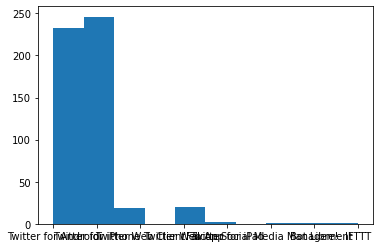

In [80]:
# Plotting the distribution of sources
plt.hist(tweet_source)

## 9.Analyzing plot the relation between retweet and favorite

In [84]:
# Extracting retweet count for each tweet
retweet_count=[
    t[0]
    for t in retweets
    
]

In [85]:
# Extracting favorite count for each tweet
favorite_count=[
    t[1]
    for t in retweets
    
]

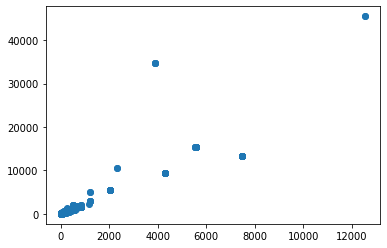

In [86]:
# Plotting the scatter plot
plt.scatter(retweet_count,favorite_count)

## 10.Final thougts